# Solving for izotropic and anizotropic system

In [ ]:
# Calculating currents in each ring on fft way for border structure, but with fixed number of rings
import numpy as np
from Fast_Method import solvesystem
from Geometry import Rectangle_packing
from Impedance_matrix import M_grad
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
import json

Inductance = {}
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
Omega =  np.linspace(omega_0*0.9, omega_0*1.4, 1000)
H_0z = 1
mu_0 = 4 * np.pi * 1e-7
# Calculate polarisation for different structures

Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
# Initial position of the first ring for each orientation
R0 = {
    'z': {'nz': 0, 'ny': Dy/2, 'nx': Dx/2},
    'y': {'nz': Dz/2, 'ny': 0, 'nx': Dx/2},
    'x': {'nz': Dz/2, 'ny': Dy/2, 'nx': 0}
}
#Total number of rings for each orientation
N = 20*20*20 

shape = {'z': {'nz': 20, 'ny': 20, 'nx': 20}}
Params['N'] = shape
# make 3d structure
print(f'\n Make rings: {Params["N"]}')
Rings_4d ={}
for pos in Params['N']:
    Rings_4d[pos] = Rectangle_packing(Params, r0 = R0[pos], orientation=pos).reshape(
                                                 Params['N'][pos]['nz'],
                                                 Params['N'][pos]['ny'],
                                                 Params['N'][pos]['nx'])
Params['Number'] = int(np.sum([Rings_4d[pos].size for pos in Params['N']]))
print([Rings_4d[pos].size for pos in Params['N']], Params['Number'])
phi_0z = np.zeros(Params['Number'])
Number_z = Params['N']['z']['nz'] * Params['N']['z']['ny'] * Params['N']['z']['nx']
phi_0z[:Number_z] = H_0z * mu_0*np.pi * Radius ** 2
#print(Rings_4d)
#print(phi_0z/H_0z/mu_0/np.pi/Radius**2)
Grad = {'z': [[0,0,0], [0, 0, 0.1], [0, 0, 0.3]],
        'y': [[0,0,0], [0, 0.1, 0], [0, 0.3, 0]],
        'x': [[0,0,0], [0.1, 0, 0], [0.3, 0, 0]]}

#for pos in Grad:
for pos in Grad:
    for grad in Grad[pos]:
        print(f'grad = {grad}')
        print(f'Frequency modeling: {round(Omega[0]/2/np.pi/1e6, 1)}-{round(Omega[-1]/2/np.pi/1e6, 2)} MHz')
        Currents = solvesystem(Rings_4d, M_grad(Params, grad = grad), Omega, phi_0z=phi_0z, Inductance = Inductance, tol = 1e-3)
        Nz, Ny, Nx = Params['N']['z']['nz'], Params['N']['z']['ny'], Params['N']['z']['nx']
        P_0z = np.pi * Radius ** 2 /H_0z/Dz/Dy/Dx
        Currents['Params'] = Params
        Currents['RealZPolarisation'] = [P_0z/Number_z * sum(i[:Number_z]) for i in Currents['RealCurrents']]
        Currents['ImagZPolarisation'] = [P_0z/Number_z * sum(i[:Number_z]) for i in Currents['ImagCurrents']]

        dims = ''.join([pos for pos in Params['N']])
        with open(f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Currents-{dims}-{Nz}x{Ny}x{Nx}-{max(grad)}", "w") as f:
            json.dump(Currents, f)

        exclude = ['RealCurrents', 'ImagCurrents']
        data = {key: value for key, value in Currents.items() if key not in exclude}
        with open(f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Data-{dims}-{Nz}x{Ny}x{Nx}-{max(grad)}", "w") as f:
            json.dump(data, f)

In [ ]:
# Calculating currents in each ring on fft way for border structure, but with fixed number of rings
import numpy as np
from Fast_Method import solvesystem
from Geometry import Rectangle_packing
from Impedance_matrix import M_grad
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
import json

Inductance = {}
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
Omega =  np.linspace(omega_0*0.9, omega_0*1.4, 1000)
H_0z = 1
mu_0 = 4 * np.pi * 1e-7
# Calculate polarisation for different structures

Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
# Initial position of the first ring for each orientation
R0 = {
    'z': {'nz': 0, 'ny': Dy/2, 'nx': Dx/2},
    'y': {'nz': Dz/2, 'ny': 0, 'nx': Dx/2},
    'x': {'nz': Dz/2, 'ny': Dy/2, 'nx': 0}
}
#Total number of rings for each orientation
N = 21*20*20 *3

shape = {'z': {'nz': 21, 'ny': 20, 'nx': 20},
         'y': {'nz': 20, 'ny': 21, 'nx': 20},
         'x': {'nz': 20, 'ny': 20, 'nx': 21} }
Params['N'] = shape
# make 3d structure
print(f'\n Make rings: {Params["N"]}')
Rings_4d ={}
for pos in Params['N']:
    Rings_4d[pos] = Rectangle_packing(Params, r0 = R0[pos], orientation=pos).reshape(
                                                 Params['N'][pos]['nz'],
                                                 Params['N'][pos]['ny'],
                                                 Params['N'][pos]['nx'])
Params['Number'] = int(np.sum([Rings_4d[pos].size for pos in Params['N']]))
print([Rings_4d[pos].size for pos in Params['N']], Params['Number'])
phi_0z = np.zeros(Params['Number'])
Number_z = Params['N']['z']['nz'] * Params['N']['z']['ny'] * Params['N']['z']['nx']
phi_0z[:Number_z] = H_0z * mu_0*np.pi * Radius ** 2
#print(Rings_4d)
#print(phi_0z/H_0z/mu_0/np.pi/Radius**2)
Grad = {'z': [[0,0,0], [0, 0, 0.1], [0, 0, 0.3]],
        'y': [[0,0,0], [0, 0.1, 0], [0, 0.3, 0]],
        'x': [[0,0,0], [0.1, 0, 0], [0.3, 0, 0]]}

#for pos in Grad:
for pos in Grad:
    for grad in Grad[pos]:
        if max(grad) != 0:
            print(f'grad = {grad}')
            print(f'Frequency modeling: {round(Omega[0]/2/np.pi/1e6, 1)}-{round(Omega[-1]/2/np.pi/1e6, 2)} MHz')
            Currents = solvesystem(Rings_4d, M_grad(Params, grad = grad), Omega, phi_0z=phi_0z, Inductance = Inductance, tol = 1e-3)
            Nz, Ny, Nx = Params['N']['z']['nz'], Params['N']['y']['ny'], Params['N']['x']['nx']
            P_0z = np.pi * Radius ** 2 /H_0z/Dz/Dy/Dx
            Currents['Params'] = Params
            Currents['RealZPolarisation'] = [P_0z/Number_z * sum(i[:Number_z]) for i in Currents['RealCurrents']]
            Currents['ImagZPolarisation'] = [P_0z/Number_z * sum(i[:Number_z]) for i in Currents['ImagCurrents']]
    
            dims = ''.join([pos for pos in Params['N']])
            with open(f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Currents-{dims}-{Nz}x{Ny}x{Nx}-{max(grad)}", "w") as f:
                json.dump(Currents, f)
    
            exclude = ['RealCurrents', 'ImagCurrents']
            data = {key: value for key, value in Currents.items() if key not in exclude}
            with open(f"Data/Grad_Data/izotropic/Cube/{pos}-grad/Data-{dims}-{Nz}x{Ny}x{Nx}-{max(grad)}", "w") as f:
                json.dump(data, f)

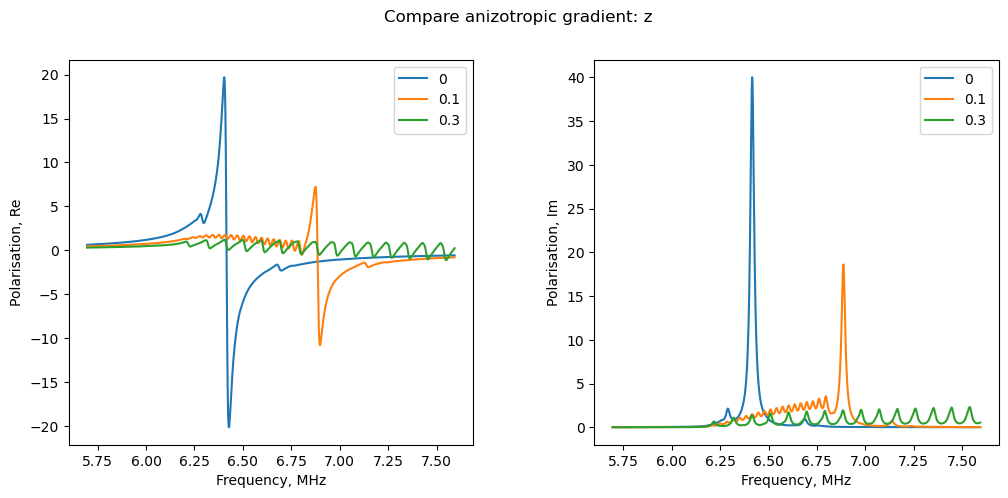

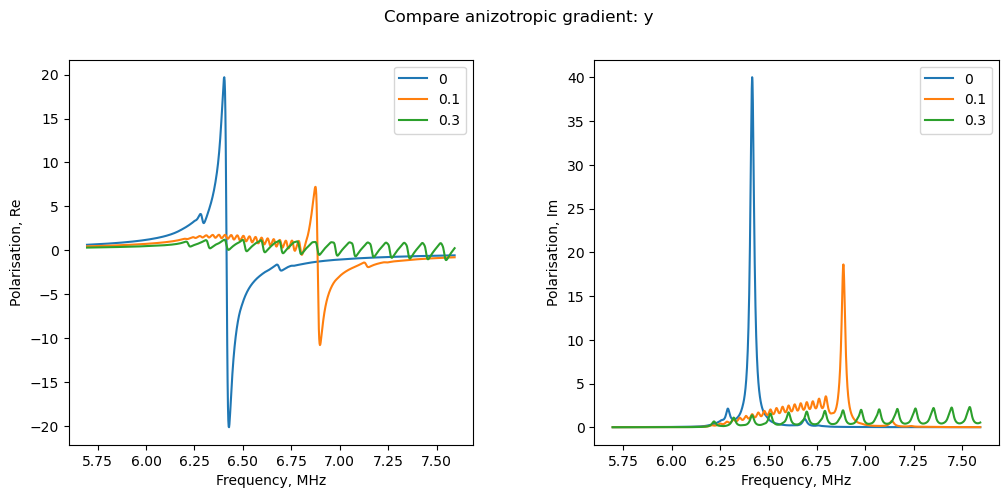

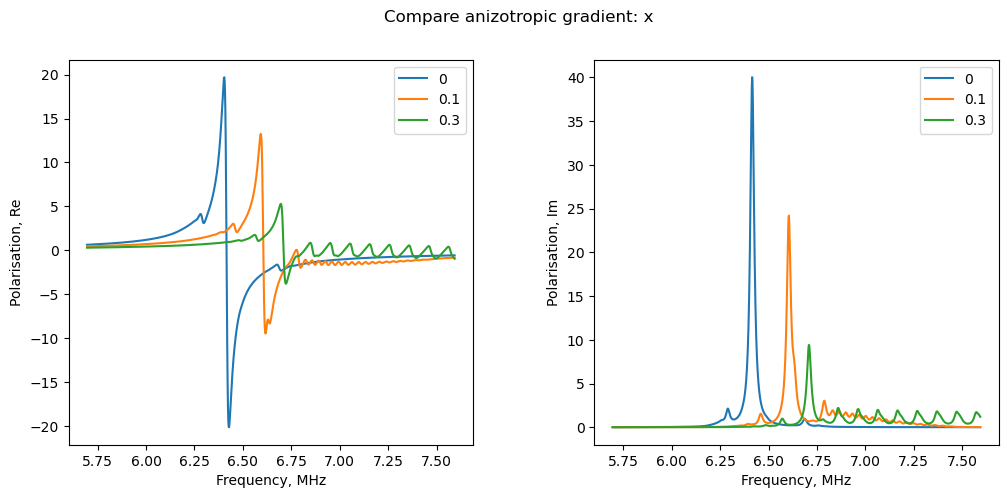

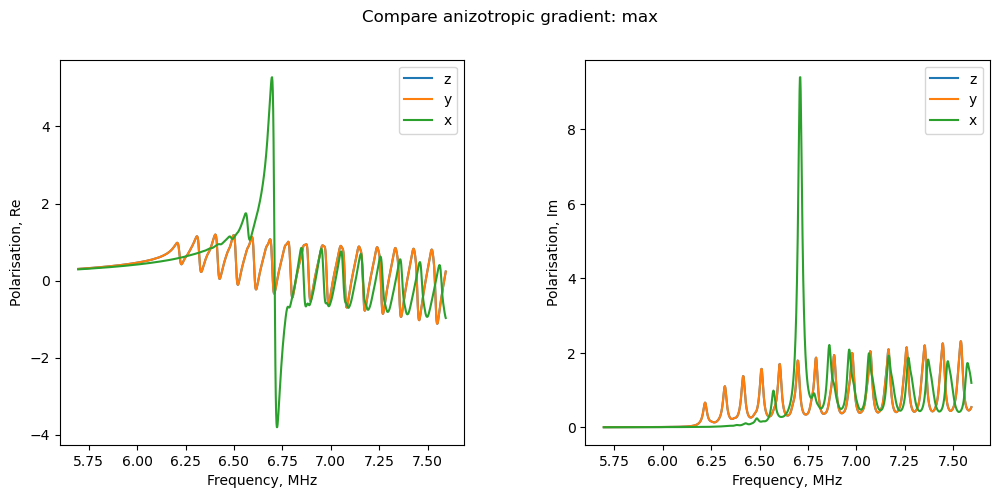

In [26]:
# Plot anizotropoc structure
import json
import numpy as np
import matplotlib.pyplot as plt
from Verifying_MRI.Parameters_MRI import Params
from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])



for pos in Grad:
    plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.suptitle(f'Compare anizotropic gradient: {pos}')
    for grad in Grad[pos]:
        with open(f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Data-z-20x20x20-{max(grad)}", "r") as f:
            Data = json.load(f)
        Omega = np.array(Data["Omega"])
        RealPolarisation = np.array(Data["RealZPolarisation"]) 
        ImagPolarisation = np.array(Data["ImagZPolarisation"]) 
        plt.subplot(121)
        plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = max(grad), linestyle = '-')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Re")
        plt.legend()
    
        plt.subplot(122)
        plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = max(grad), linestyle = '-')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Im")
        plt.legend()

# Compare maximum gradient in each direction
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle(f'Compare anizotropic gradient: max')
for pos in Grad:
    with open(f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Data-z-20x20x20-0.3", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealZPolarisation"]) 
    ImagPolarisation = np.array(Data["ImagZPolarisation"]) 
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = pos, linestyle = '-')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")
    plt.legend()

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = pos, linestyle = '-')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")
    plt.legend()

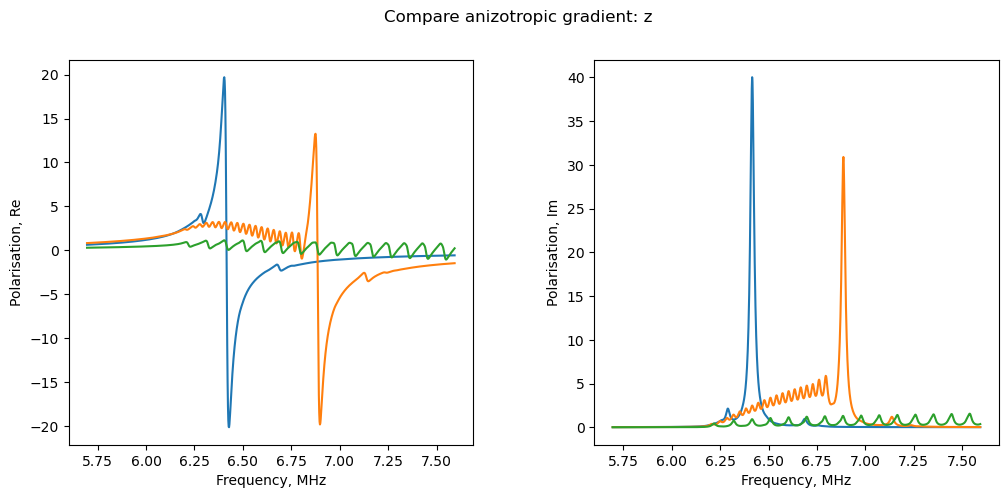

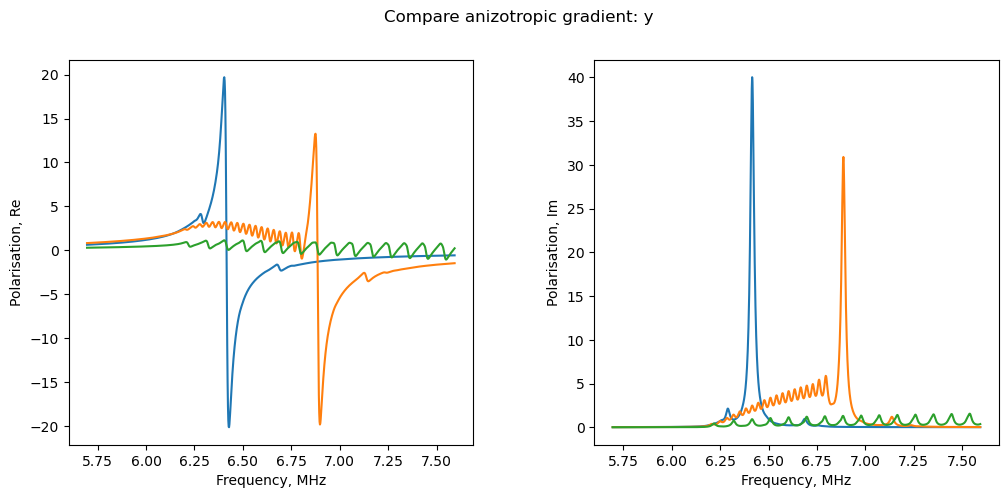

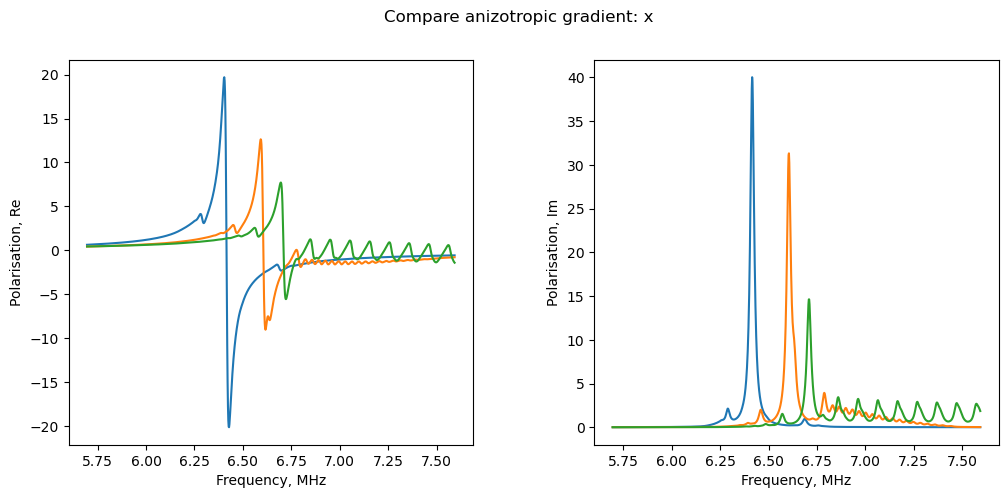

In [17]:
# Plot anizotropoc structure
import json
import numpy as np
import matplotlib.pyplot as plt
from Verifying_MRI.Parameters_MRI import Params
from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])

with open("Data/Grad_Data/anizotropic/Cube/z-grad/Currents-z-20x20x20-0", "r") as f:
    Currents = json.load(f)
    base_reI = np.array(max([max(i) for i in Currents['RealCurrents']]))    
    base_imI = np.array(max([max(i) for i in Currents['ImagCurrents']]))

for pos in Grad:
    plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.suptitle(f'Compare anizotropic gradient: {pos}')
    for grad in Grad[pos]:
        with open (f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Currents-z-20x20x20-{max(grad)}", "r") as f:
            Currents = json.load(f)
            max_reI = np.array(max([max(i) for i in Currents['RealCurrents']]))
            max_imI = np.array(max([max(i) for i in Currents['ImagCurrents']]))
        
        with open(f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Data-z-20x20x20-{max(grad)}", "r") as f:
            Data = json.load(f)
        Omega = np.array(Data["Omega"])
        RealPolarisation = np.array(Data["RealZPolarisation"]) * max_reI/base_reI
        ImagPolarisation = np.array(Data["ImagZPolarisation"]) * max_imI/base_imI
        plt.subplot(121)
        plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = max(grad), linestyle = '-')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Re")
        plt.legend()

        plt.subplot(122)
        plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = max(grad), linestyle = '-')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Im")
        plt.legend()



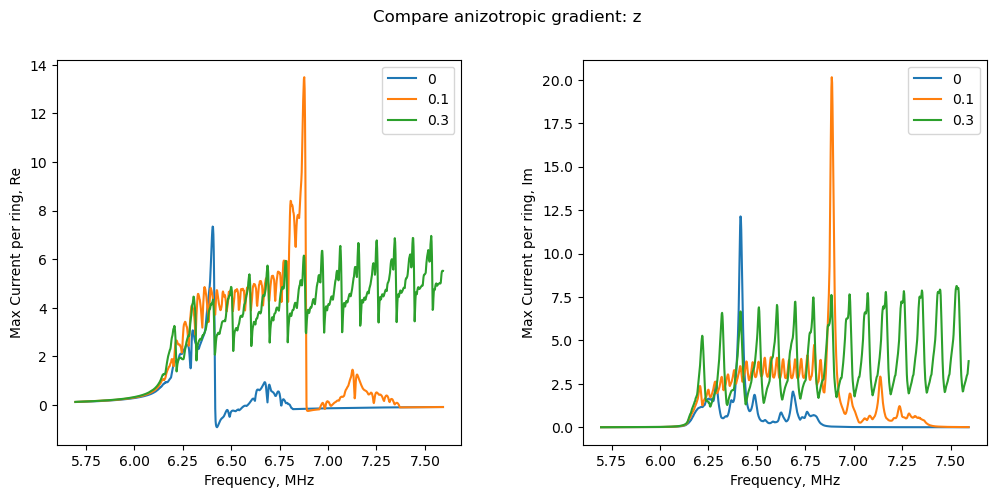

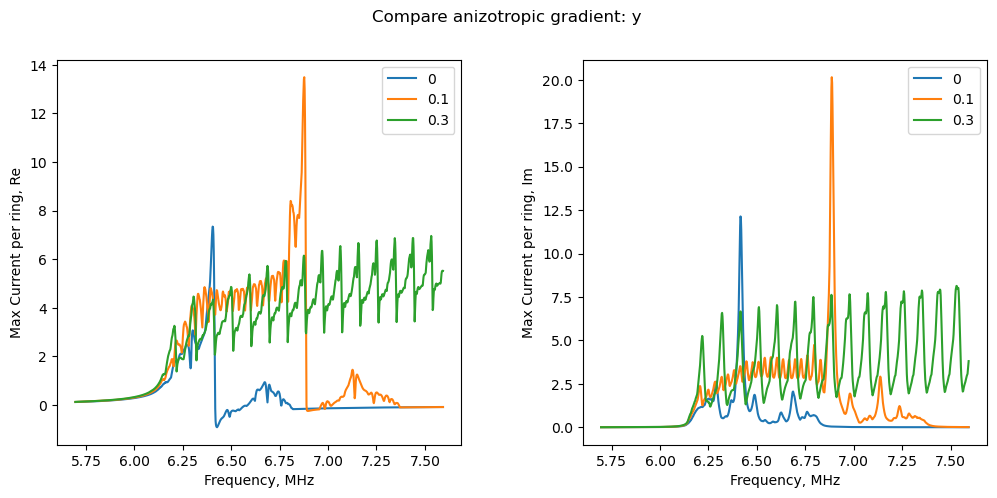

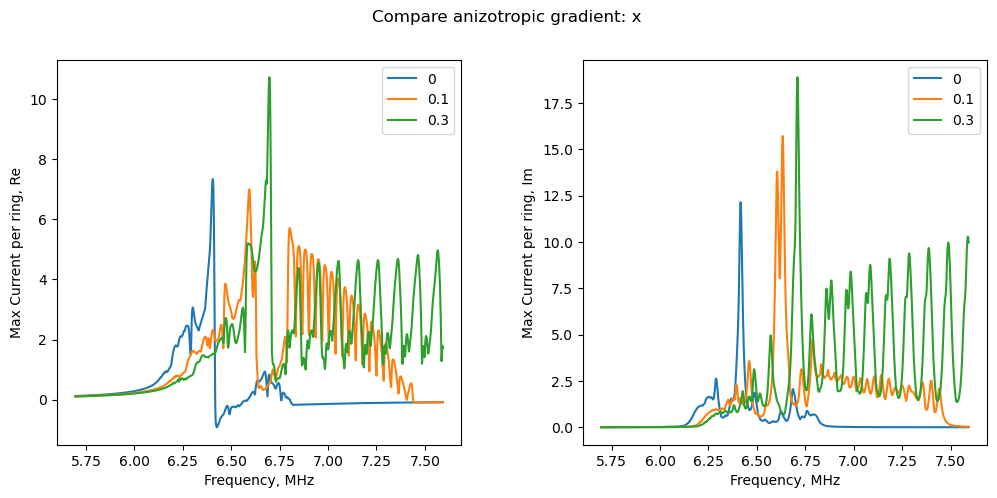

In [27]:
# Plot anizotropoc structure
import json
import numpy as np
import matplotlib.pyplot as plt
from Verifying_MRI.Parameters_MRI import Params
from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
P_0z = np.pi * Params['R'] ** 2 /Params['Dz']/Params['Dy']/Params['Dx']

for pos in Grad:
    plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.suptitle(f'Compare anizotropic gradient: {pos}')
    for grad in Grad[pos]:
        with open (f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Currents-z-20x20x20-{max(grad)}", "r") as f:
            Currents = json.load(f)
            max_reI = np.array([max(i) for i in Currents['RealCurrents']])
            max_imI = np.array([max(i) for i in Currents['ImagCurrents']])
        
        with open(f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Data-z-20x20x20-{max(grad)}", "r") as f:
            Data = json.load(f)
        Omega = np.array(Data["Omega"])
        RealPolarisation = max_reI * P_0z
        ImagPolarisation = max_imI * P_0z
        plt.subplot(121)
        plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = max(grad), linestyle = '-')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Max Current per ring, Re")
        plt.legend()

        plt.subplot(122)
        plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = max(grad), linestyle = '-')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Max Current per ring, Im")
        plt.legend()


# Draw current distribution

In [19]:
# Making GIF for polarisation for different orientations
import json
import numpy as np
import matplotlib.pyplot as plt


# Get Data for plotting
Data = {}
shape = '20x20x20'
with open(f"Data/Grad_Data/anizotropic/Cube/z-grad/Currents-z-{shape}-0", "r") as f:
    Data[shape] = json.load(f)

# Nz, Ny, Nx = 11, 11, 11
# with open (f'Data/Form_Data/izotropic/Cube/S-Currents-{dims}-{Nz}x{Ny}x{Nx}', 'r') as f:
#     Data_straight = json.load(f)

# Data = Data_fft.copy()
# Data['RealCurrents'] = abs(np.array(Data_fft['RealCurrents'])- np.array(Data_straight['RealCurrents']))/abs(np.array(Data_straight['RealCurrents']))
# Data['ImagCurrents'] = abs(np.array(Data_fft['ImagCurrents'])- np.array(Data_straight['ImagCurrents']))/abs(np.array(Data_straight['ImagCurrents']))


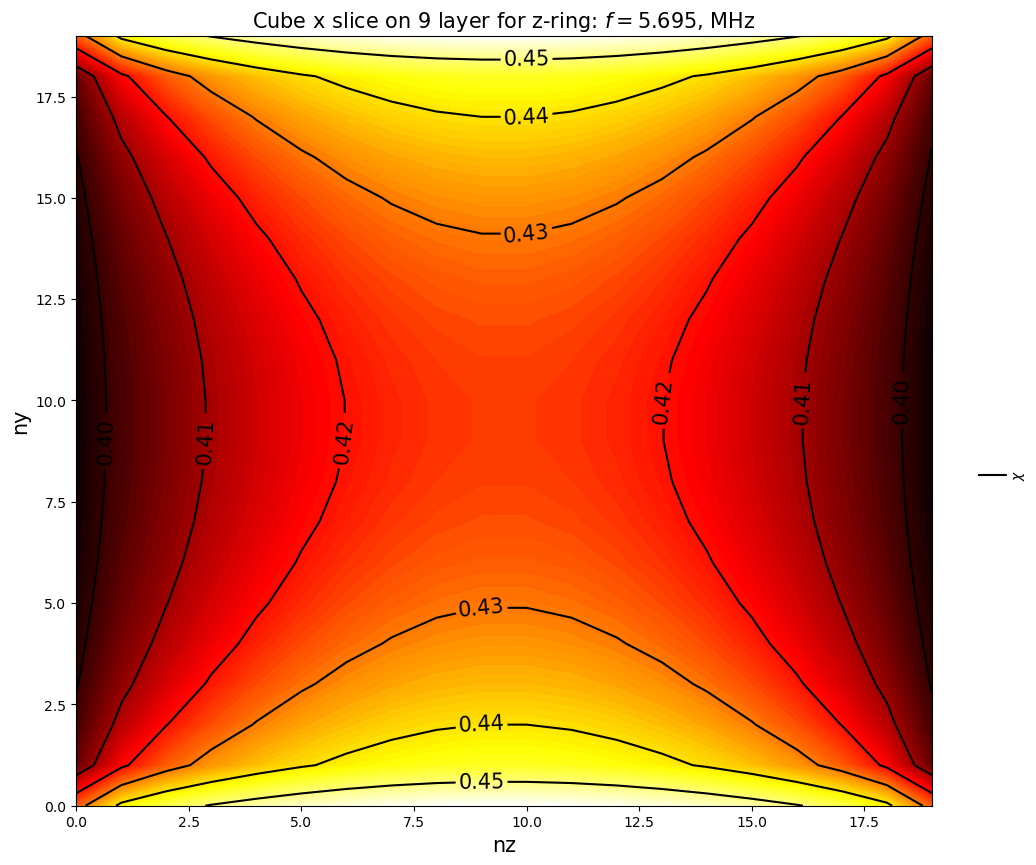

In [21]:
# Calculate and compare polarisation for different structures

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anime
from tqdm import tqdm

# Drawing GIFs

''' 
- Datas_sets is a dictionary with keys as names of datasets and values as datasets
- rtypes is a list of ring types
- slice_ors is a list of slice orientations
- slice_deeps is a dictionary with keys as tuples (name, rtype, slice_or) and values as lists of slice deeps,
number of slice deeps should be the same for each id
- name is a name of the GIF 
'''
def SaveDistribution(Data_sets, rtypes, slice_ors, slice_deeps, Name):
    
    # Get Data for plotting
    Currents2D = {}
    Omega = {}
    MaxCurrents = {}
    MinCurrents = {}
    MaxDeltaCurrents = {}
    n_1, n_2 = {}, {}
    X, Y = {}, {}

    grid_num = 0
    for name in Data_sets:
        Data = Data_sets[name]
        Omega[name] = np.array(Data["Omega"])
        Currents_4D = np.array(Data["RealCurrents"], dtype = complex) + 1j * np.array(Data["ImagCurrents"], dtype= complex)

        Params = Data['Params']

        Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
        Radius = Params['Radius']
        N = Params['N']
        H_0z = 1

        for rtype in rtypes:
            start = 0
            # Calculate start and end positions for each ring type
            for ring_type in N:
                if ring_type != rtype:
                    start += np.prod([N[ring_type][j] for j in N[ring_type]])
                else:
                    break
            end = start + np.prod([N[rtype][j] for j in N[rtype]])

            for slice_or in slice_ors:
                slice_id = (name, rtype, slice_or)
                for slice_deep in slice_deeps[slice_id]:
                    # Calculate position in plotting grid
                    data_pos = 1 + list(Data_sets.keys()).index(name)
                    slice_deep_pos = list(slice_deeps[slice_id]).index(slice_deep) * len(Data_sets)
                    slice_pos = list(slice_ors).index(slice_or) * len(Data_sets) * len(slice_deeps[slice_id])
                    rtype_pos = list(rtypes).index(rtype) * len(Data_sets) * len(slice_ors) * len(slice_deeps[slice_id])

                    grid_num = data_pos + slice_pos + slice_deep_pos + rtype_pos
                    Id = (name, rtype, slice_or, slice_deep, grid_num)
                    
                    # Get current slice for choosen parameters
                    rslice = [slice(slice_deep * (slice_or =='z'), (slice_deep+1)*(slice_or=='z') + N[rtype]['nz'] * (slice_or != 'z'), 1),
                      slice(slice_deep * (slice_or =='y'), (slice_deep+1)*(slice_or=='y') + N[rtype]['ny'] * (slice_or != 'y'), 1),
                      slice(slice_deep * (slice_or =='x'), (slice_deep+1)*(slice_or=='x') + N[rtype]['nx'] * (slice_or != 'x'), 1)]

                    Currents2D[Id] = np.real(np.squeeze(Currents_4D[:,start:end].reshape([len(Omega[name])]+ [N[rtype][j] for j in N[rtype]])[:, *rslice]))*np.pi * Radius ** 2 /Dz/Dy/Dx/H_0z

                    # Calculate extremums for each slice
                    MaxCurrents[Id] = Currents2D[Id].max()
                    MinCurrents[Id] = Currents2D[Id].min()
                    MaxDeltaCurrents[Id] = MaxCurrents[Id] - MinCurrents[Id]

                    n_1[Id], n_2[Id] = tuple([j for j in N[rtype].keys() if j != f'n{slice_or}'])

                    X[Id], Y[Id] = list(range(N[rtype][n_1[Id]])), list(range(N[rtype][n_2[Id]]))
        

    fig, ax = plt.subplots()

    # Numbers of plots in x and y axes

    xn = len(Data_sets) * len(slice_deeps[slice_id])
    yn = len(rtypes) * len(slice_ors) 

    # Figsize
    xsize = xn*12
    ysize = yn*10

    def plot_GIF(i):
        # Clearing figure and set figsize
        plt.clf()
        fig.set_size_inches(xsize, ysize)
        for Id in Currents2D:
            name, rtype, slice_or, slice_deep, grid_num = Id
            
            plt.subplot(yn, xn, grid_num)
            Currents = Currents2D[Id][i]    
            omega = Omega[name][i]

            # Set axes scale and avoid extra long plots
            scale = len(Y[Id])/len(X[Id])

            if scale < 1/3:
                ax.set_aspect(1/3)
            elif scale > 3:
                ax.set_aspect(3)
            else:
                ax.set_aspect(scale)

            # Draw same-value lines
            Lines = plt.contour(X[Id], Y[Id], Currents.T, 6, colors = 'black')

            # Calculate max currents to normilze it for spectral max
            Imax, Imin = Currents.max(), Currents.min()
            DeltaCurrents = Imax - Imin
            
            # Calculate length of colorbar
            amplitude = DeltaCurrents/MaxDeltaCurrents[Id]

            if abs((Imin - MinCurrents[Id])/Imin) < 1e-3 and abs((Imax - MaxCurrents[Id])/MaxCurrents[Id]) < 1e-3:
                middlepos = 0
            else:
                middlepos = (Imin-MinCurrents[Id])/(MaxDeltaCurrents[Id] - DeltaCurrents)

            # Calculate number of ticks depended on coloubar length
            ticksnumber = round(amplitude * 10) + 1
            ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

            plt.xlabel(n_1[Id], fontsize = 15)
            plt.ylabel(n_2[Id], fontsize = 15)

            # Draw colormap
            plt.contourf(X[Id], Y[Id], Currents.T, 100, cmap=plt.cm.hot)
            plt.clabel(Lines, inline=1, fontsize=15)
            plt.colorbar(label = r'$\chi$', fraction = 0.03, pad = 0.05, 
                              shrink = 10, aspect = amplitude/0.03, anchor = (0, middlepos),
                              ticks = ticks)
            plt.title(f"{name} {slice_or} slice on {slice_deep} layer for {rtype}-ring: $f =${round(omega/2/np.pi/10 ** 6, 3)}, MHz", fontsize = 15)

    # Make and save animation object
    ani = anime.FuncAnimation(fig, plot_GIF,
                              frames = list(range(len(Omega[name]))),
                              interval = 50
                              )

    ani.save(f'{Name}.gif', writer='pillow', fps=24, dpi=80)

Data_sets = {'Cube': Data['20x20x20']}#, 'Straight': Data_straight}
rtypes = ('z')
slice_ors = ('x')
slice_deeps = {}
for name in Data_sets:
    for rtype in rtypes:
        for slice_or in slice_ors:
            slice_deeps[(name, rtype, slice_or)] = [9]
SaveDistribution(Data_sets, rtypes, slice_ors, slice_deeps, f'Plots/Current_distribution/Grad/CubeZX10-11x11x11') 